<img src="https://codebrightly.com/wp-content/uploads/2020/10/1055.jpg" alt="Dataset Cover">

In [ ]:
https://statso.io/sentiment-analysis-case-study/#google_vignette

* Bu projede bir mobil app'in kullanıcı yorumlarını olumlu ve olumsuz olanlarını inceleyeceğiz, notr olanları katmayacağım, yorumlarda en çok geçen 30 kelimeyi bulup grafiğe dökeceğim ve son olarakta bir makine öğrenmesi modeliyle tahmin yaptıracağım.

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import neattext.functions as nfx
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("linkedin-reviews.csv")

In [3]:
df.head()

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


In [8]:
df.shape

(702, 2)

In [9]:
df.isnull().sum()

Review    0
Rating    0
dtype: int64

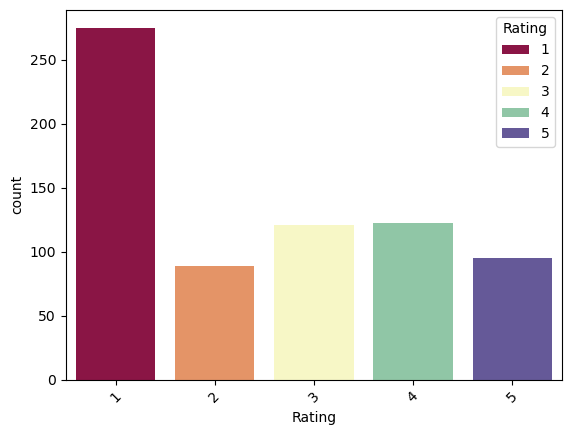

In [5]:
sns.countplot(x=df['Rating'], hue=df['Rating'], palette='Spectral')
plt.xticks(rotation=45);

In [12]:
df.loc[(df['Rating']==1)|(df['Rating']==2)|(df['Rating']==3),'sentiment']='negative'
df.loc[(df['Rating']==4)|(df['Rating']==5),'sentiment']='positive'

In [14]:
df['Review']=df['Review'].apply(lambda x: nfx.clean_text(x))

In [19]:
df['Review']=df['Review'].apply(lambda x: nfx.normalize(x))

In [26]:
df['Review'] = df['Review'].apply(nfx.remove_punctuations)

In [32]:
df['Review'] = df['Review'].str.replace('*', '', regex=False)

In [33]:
df["Review"] = df["Review"].str.replace(":)", "", regex=False)

In [20]:
df['Review'][70]

"updated review: restarted phone app works fine now. negative there's settings options (i. e. notifications, etc...) - captivate"

In [34]:
df['Review'].tolist()

['absolutely linkedin beginner force closes too useless app',
 'force close(galaxy tab)',
 'slow tries upload contacts asking wtf',
 'add ability customize profile sd card app  star one',
 'good app pain possible sent messages kind confusing message sent all',
 'app poor bad linkedin app htc desire bugged :(',
 'finally',
 'droidin ability sd card  star rating thank you kyle evo',
 'works fine samsung captivate',
 'clean design limited features adding invites email address book integration',
 'app works fine limited functionality im uninstalling features like group access',
 'piece st app really want people use this',
 'simple basic works perfectly main functions fast stable',
 'pay',
 'lame try later features sync unnecessary drains battery',
 'special comparing web please enable installsdcard',
 'good start emulating program android experienced problems program all mighty fine jam fellows',
 'great app  better laptop',
 'bad start needs features like upload image aval website  nice t

In [35]:
r=' '.join(df['Review'].tolist())

In [37]:
Counter(r.split()) 

Counter({'app': 162,
         'update': 112,
         'new': 59,
         'great': 55,
         'slow': 54,
         'version': 52,
         'good': 50,
         'profile': 47,
         'works': 46,
         'better': 43,
         'cant': 43,
         'groups': 42,
         'needs': 41,
         'htc': 40,
         'work': 39,
         'like': 37,
         'desire': 32,
         'working': 32,
         'linkedin': 31,
         'nice': 31,
         'contacts': 30,
         'force': 29,
         'use': 28,
         'phone': 27,
         'access': 26,
         'load': 26,
         'time': 26,
         'ui': 25,
         'sd': 23,
         'fine': 23,
         'sync': 23,
         'edit': 23,
         'updates': 23,
         'droid': 23,
         'need': 23,
         'uninstalled': 22,
         'interface': 22,
         'group': 21,
         'latest': 21,
         'features': 20,
         'ok': 20,
         'contact': 18,
         'open': 18,
         'galaxy': 17,
         'x': 17,
      

In [38]:
data=Counter(r.split()).most_common(30) #en çok geçen 3o kelimeui buldu

In [40]:
print(data)

[('app', 162), ('update', 112), ('new', 59), ('great', 55), ('slow', 54), ('version', 52), ('good', 50), ('profile', 47), ('works', 46), ('better', 43), ('cant', 43), ('groups', 42), ('needs', 41), ('htc', 40), ('work', 39), ('like', 37), ('desire', 32), ('working', 32), ('linkedin', 31), ('nice', 31), ('contacts', 30), ('force', 29), ('use', 28), ('phone', 27), ('access', 26), ('load', 26), ('time', 26), ('ui', 25), ('sd', 23), ('fine', 23)]


In [42]:
data=dict(data)

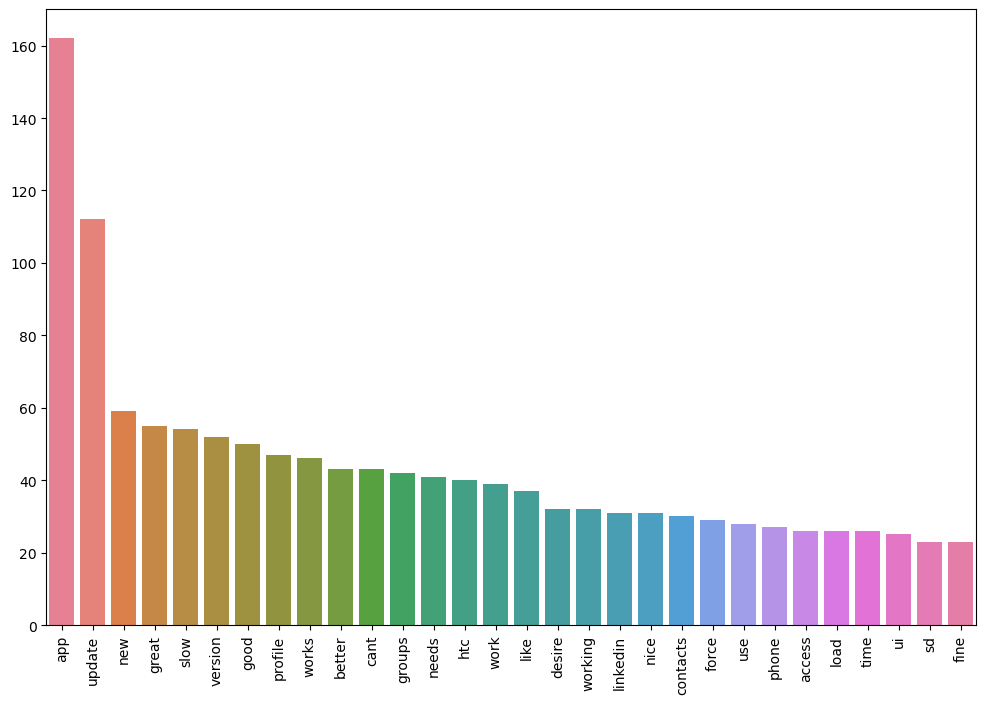

In [43]:
plt.figure(figsize=(12,8))
sns.barplot(x=data.keys(),y=data.values(),hue=data.keys())
plt.xticks(rotation=90);   #kodu renkli yaptı

In [58]:
def kokbul(Review):
    words=TextBlob(Review).words
    return[word.lemmatize() for word in words]

In [59]:
df['Review']=df['Review'].apply(lambda x: nfx.remove_stopwords(x))

In [60]:
yeni=df[(df.Rating==1)|(df.Rating==5)]

In [61]:
x=yeni[['Review']]
y=yeni[['Rating']]

In [62]:
vect=CountVectorizer(analyzer=kokbul,ngram_range=(1,2))

In [64]:
xyenid=vect.fit_transform(x['Review'])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:541: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


In [67]:
x_train,x_test,y_train,y_test=train_test_split(xyenid,y,test_size=.20,random_state=20)

In [68]:
nb=MultinomialNB()

In [69]:
model=nb.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [70]:
pred=model.predict(x_test)

In [71]:
accuracy_score(y_test,pred)

0.7972972972972973